<a href="https://colab.research.google.com/github/Balajilp/Chennai_House_Price_Prediction/blob/main/Chennai_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [92]:
# connecting the colab into google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [93]:
# importing all the libraries for Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
# loading the Dataset using pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/train-chennai-sale.csv')
df.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,12-04-1979,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,15-03-1996,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,14-04-1977,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,26-06-1991,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


In [95]:
# finding the Shape of the DataFrame
df.shape

(7109, 22)

#### observation:
1.DataFrame contains 7109 rows, and 22 Features

In [96]:
# Basic infermation about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

#### observations:
1. N_BEDROOM, N_BATHROOM, QS_OVERALL this features has the missing values.
2. DATE_SALE, DATE_BUILD this features are date features, based on this we need to find the age of the house. after that we can drop this features.
3. QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL this features computed by websites.  we don't have trust on this. we can remove it.
4. PRT_ID, COMMMIS, REG_FEE this is also not required. we can remove it.

In [97]:
# we can remove the unwanted features
df1 = df.copy()
df1.drop(['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'PRT_ID', 'COMMIS', 'REG_FEE'], axis=1, inplace=True)

In [98]:
df1.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,7406250


In [99]:
# printing the shape of the DataFrame
df1.shape

(7109, 15)

In [100]:
# Basic statistical description about the Dataset
df1.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,2.366734e+07


In [101]:
# Checking the Null values
df1.isnull().sum()
# 2 Features having the Null values

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
SALES_PRICE      0
dtype: int64

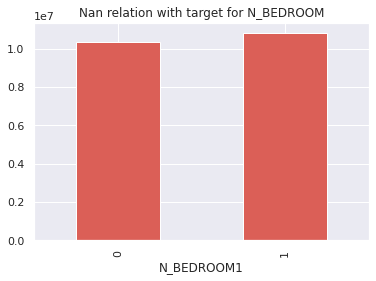

In [102]:
# Relationship for missing values with sales price for N_BEDROOM Feature
df['N_BEDROOM1'] = np.where(df['N_BEDROOM'].isnull(), 1, 0)
df.groupby('N_BEDROOM1')['SALES_PRICE'].median().plot.bar()
plt.title("Nan relation with target for N_BEDROOM")
plt.show()

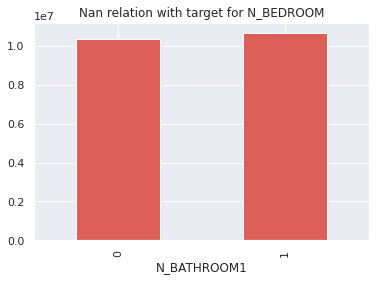

In [103]:
# Relationship for missing values with sales price for N_BATHROOM Feature
df['N_BATHROOM1'] = np.where(df['N_BATHROOM'].isnull(), 1, 0)
df.groupby('N_BATHROOM1')['SALES_PRICE'].median().plot.bar()
plt.title("Nan relation with target for N_BEDROOM")
plt.show()

#### observations:
1. Relationship of missing values with the Salesprice is pretty much high.  So we have to Replace this missing values with something meaningfull

### Filling the missing values

In [104]:
# Filling the missing values with median
df1['N_BEDROOM'].fillna(df1['N_BEDROOM'].mode()[0], inplace=True)
df1['N_BATHROOM'].fillna(df1['N_BATHROOM'].mode()[0], inplace=True)

### Checking the variance after filling the missing values

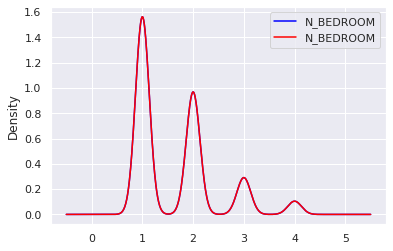

In [105]:
# Checking is there any change in the variance for N_BEDROOM
fig = plt.figure()
ax = fig.add_subplot(111)
df['N_BEDROOM'].plot(kind='kde', ax=ax, color='blue')
df1.N_BEDROOM.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


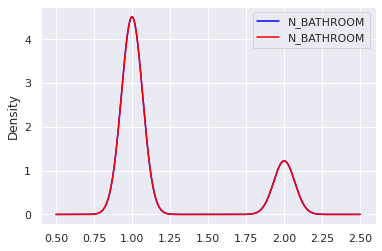

In [106]:
# # Checking is there any change in the variance for N_BEDROOM
fig = plt.figure()
ax = fig.add_subplot(111)
df['N_BATHROOM'].plot(kind='kde', ax=ax, color='blue')
df1.N_BATHROOM.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### observations:
1.  There is no change in variance after filling the missing values. it is absolutely fine.


# Univariate Analysis

In [107]:
df1['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

#### observation:
1. In Area same area spelling is different. so we got 2 different areas. but actually they are same. so we need to format the data.

In [108]:
df2 = df1.copy()
df2['AREA'].replace(['Ana Nagar', 'Ann Nagar', 'Adyr', 'Chrompt', 'Chormpet', 'TNagar', 'Velchery', 'KKNagar', 'Karapakkam', 'Chrmpet'],
                    ['Anna Nagar', 'Anna Nagar', 'Adyar', 'Chrompet', 'Chrompet', 'T Nagar', 'Velachery', 'KK Nagar', 'Karapakam', 'Chrompet'], inplace=True)

In [109]:
# capturing the numerical feature for out analysis
Numericals = [feature for feature in df2.columns if df2[feature].dtype!='O' and feature !='SALES_PRICE']
print('Number of Numerical independent Features : {}'.format(len(Numericals)))

Number of Numerical independent Features : 5


In [110]:
# Vizualizing the Numerical variables
df2[Numericals].head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM
0,1004,131,1.0,1.0,3
1,1986,26,2.0,1.0,5
2,909,70,1.0,1.0,3
3,1855,14,3.0,2.0,5
4,1226,84,1.0,1.0,3


### Temporal Variables (Date Time Variables)
From the Dataset we have 2 year variables. we have to extract the infermation from the datetime variables like Age of the house

In [111]:
## List of Features that contains year infermations
year_features = [feature for feature in df2.columns if feature in ['DATE_BUILD', 'DATE_SALE']]
df2[year_features].head()

,DATE_SALE,DATE_BUILD
0,04-05-2011,15-05-1967
1,19-12-2006,22-12-1995
2,04-02-2012,09-02-1992
3,13-03-2010,18-03-1988
4,05-10-2009,13-10-1979


In [112]:
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [113]:
## Let's explore the content of this year variables
for feature in year_features:
  print('length of unique values {}'.format(len(df2[feature].unique())))
  print(feature, df2[feature].unique())
  print()

length of unique values 2798
DATE_SALE ['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

length of unique values 5808
DATE_BUILD ['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']



#### observations:
1. from date sale feature count of unique values is 2798
2. from date build feature count of unique values is 5808

## now we can find the age of the house in years

In [114]:
# converting object to datetime
df3 = df2.copy()
for feature in year_features:
  df3[feature] = pd.to_datetime(df2[feature]) 
df3[year_features].head()

,DATE_SALE,DATE_BUILD
0,2011-04-05,1967-05-15
1,2006-12-19,1995-12-22
2,2012-04-02,1992-09-02
3,2010-03-13,1988-03-18
4,2009-05-10,1979-10-13


Text(0.5, 1.0, 'House Price vs Yearsold')

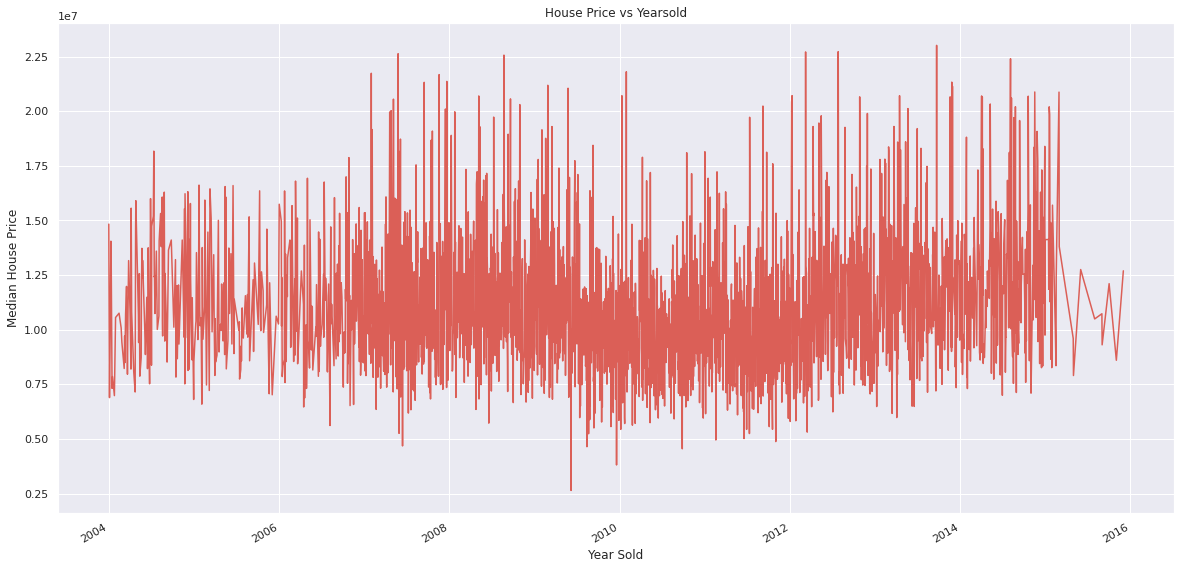

In [115]:
## Lets analyze the Temporal Datetime Variables
## we will chack whether there is a relation between year the house is sold and saleprice
plt.figure(figsize=(20, 10))
df3.groupby('DATE_SALE')['SALES_PRICE'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs Yearsold")

#### observations:
1. There is a cyclic relationship over there. not linear relationship.

In [116]:
# finding the Age of the house in Days
df3['HOUSE_AGE'] = df3['DATE_SALE']-df3['DATE_BUILD']
df3['HOUSE_AGE'].head()

0   16031 days
1    4015 days
2    7152 days
3    8030 days
4   10802 days
Name: HOUSE_AGE, dtype: timedelta64[ns]

In [117]:
# finding the age of the house in years
df3['HOUSE_AGE'] = df3['HOUSE_AGE'] / np.timedelta64(1, 'Y')

In [118]:
# rounding the age of the house using numpy round function
df3['HOUSE_AGE'] = np.round(df3['HOUSE_AGE'])
df3['HOUSE_AGE'].head()

0    44.0
1    11.0
2    20.0
3    22.0
4    30.0
Name: HOUSE_AGE, dtype: float64

#### now we can drop the date sale and date built

In [119]:
# dropping the year features from the dataset
df4 = df3.copy()
df4 = df4.drop(['DATE_BUILD', 'DATE_SALE'], axis=1)

In [120]:
df4.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOUSE_AGE
0,Karapakam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,44.0
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,11.0
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,20.0
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,9630290,22.0
4,Karapakam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,30.0


In [121]:
# capturing the categorical variables for analysis
categoricals = [feature for feature in df4.columns if df4[feature].dtype=="O"]
print('length of categorical features {}'.format(len(categoricals)))

length of categorical features 7


In [122]:
# capturing the numerical continuous features for analysis
numerical_continuous = [feature for feature in Numericals if len(df4[feature].unique())>25]
numerical_continuous

['INT_SQFT', 'DIST_MAINROAD']

In [123]:
# capturing the numerical discrete features for analysis
numerical_discrete = [feature for feature in Numericals if feature not in numerical_continuous]
numerical_discrete

['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']

In [124]:
df4[categoricals].head()

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,Karapakam,AbNormal,Yes,Commercial,AllPub,Paved,A
1,Anna Nagar,AbNormal,No,Commercial,AllPub,Gravel,RH
2,Adyar,AbNormal,Yes,Commercial,ELO,Gravel,RL
3,Velachery,Family,No,Others,NoSewr,Paved,I
4,Karapakam,AbNormal,Yes,Others,AllPub,Gravel,C


### Analyzing the Age of the house feature

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


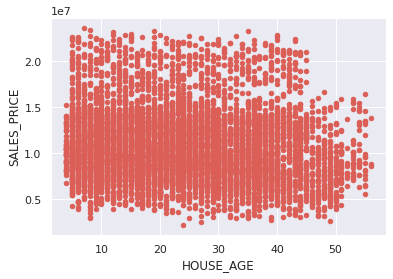

In [125]:
# analysis using scatter plot, relationship on age of the house with salesprice
import plotly.express as px 
df4.plot.scatter(x='HOUSE_AGE', y='SALES_PRICE') # try box plot

In [126]:
df4.groupby('HOUSE_AGE')['SALES_PRICE'].mean()

HOUSE_AGE
4.0     1.065067e+07
5.0     1.140857e+07
6.0     1.166451e+07
7.0     1.125365e+07
8.0     1.114652e+07
9.0     1.129464e+07
10.0    1.149553e+07
11.0    1.159547e+07
12.0    1.116491e+07
13.0    1.102983e+07
14.0    1.165118e+07
15.0    1.126483e+07
16.0    1.144733e+07
17.0    1.104237e+07
18.0    1.120390e+07
19.0    1.136103e+07
20.0    1.073542e+07
21.0    1.106103e+07
22.0    1.138442e+07
23.0    1.099733e+07
24.0    1.102941e+07
25.0    1.096332e+07
26.0    1.082144e+07
27.0    1.097423e+07
28.0    1.091633e+07
29.0    1.093297e+07
30.0    1.071995e+07
31.0    1.054846e+07
32.0    1.031627e+07
33.0    1.066529e+07
34.0    1.038092e+07
35.0    1.058726e+07
36.0    1.051683e+07
37.0    1.028102e+07
38.0    1.046118e+07
39.0    1.041489e+07
40.0    1.059189e+07
41.0    1.086958e+07
42.0    1.130106e+07
43.0    1.130420e+07
44.0    1.073453e+07
45.0    1.018461e+07
46.0    8.918344e+06
47.0    8.350374e+06
48.0    8.698967e+06
49.0    8.003444e+06
50.0    8.369591e+06
51.

In [127]:
import scipy.stats as stat
import pylab

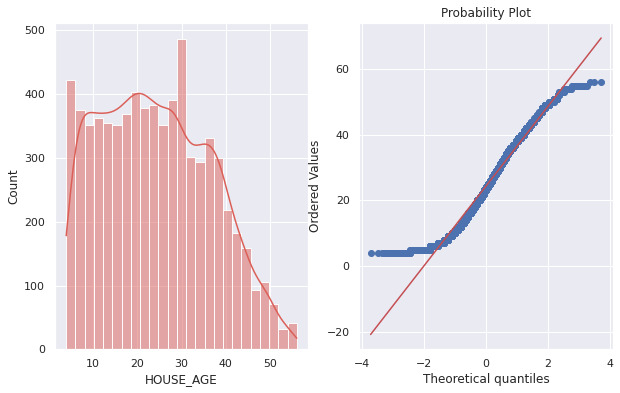

In [128]:
def plot_data(df, feature):
  plt.figure(figsize=(10, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(df[feature], kde=True)
  plt.subplot(1, 2, 2)
  stat.probplot(df[feature], dist='norm', plot=pylab)
plot_data(df4, 'HOUSE_AGE')

In [129]:
# plotting the bar graph on age of the house and salesprice
fig = px.bar(df4, x='HOUSE_AGE', y='SALES_PRICE')
fig.show()

#### observation:
1.  There is no Linear Relationship on age of the house and sales price.  It's scattered over there.  In feature engineering we try some transformation for this.

### let's analyze some categorical variables

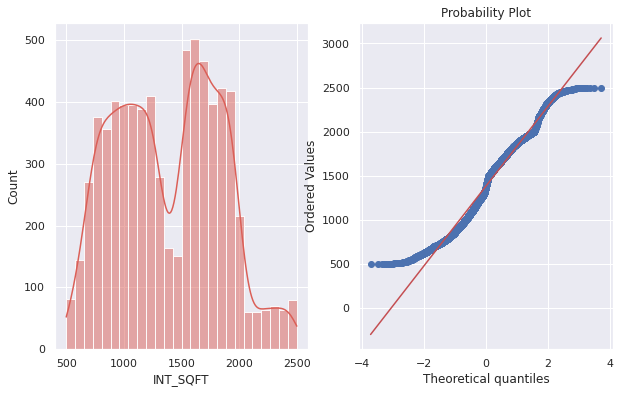

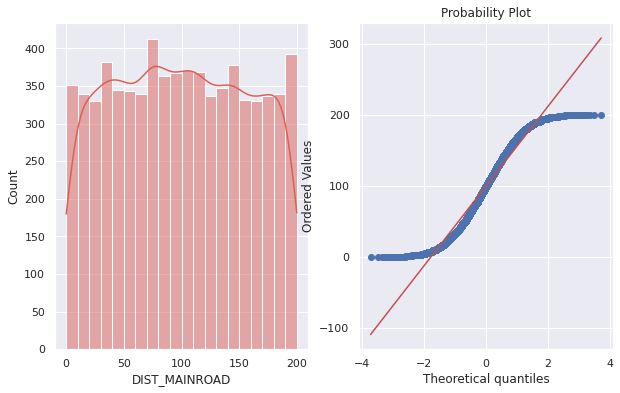

In [130]:
### Checking the Distribution of the Numerical Features
for feature in numerical_continuous:
  plot_data(df4, feature)

#### observation:
1. sqft and distance from main road doesn't following the normal distribution. we try to check is there any relationship with the target.

In [131]:
categoricals

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

### Analysing the AREA Feature

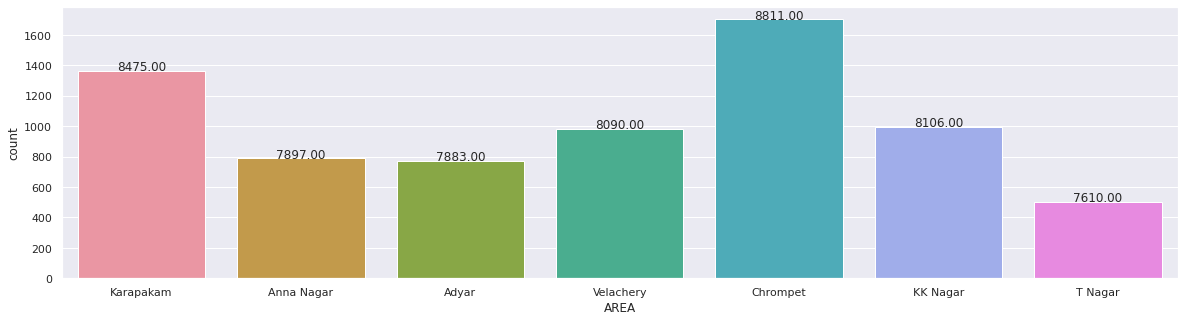

In [132]:
# Analysis using count plot
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.countplot(x='AREA', data=df4)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3,
          "{:1.2f}".format(height+df.shape[0]),
          ha='center')
# when compared to all other areas T Nagar's sales data is very less. followed by Adyar after that Anna Nagar.
# or There may be a chance of less number of buyers and sellers over there.
# Or price may be high.  if T Nagar is main area then defenitely price is high.  and no one ready to sale properties.
# let's analyse more

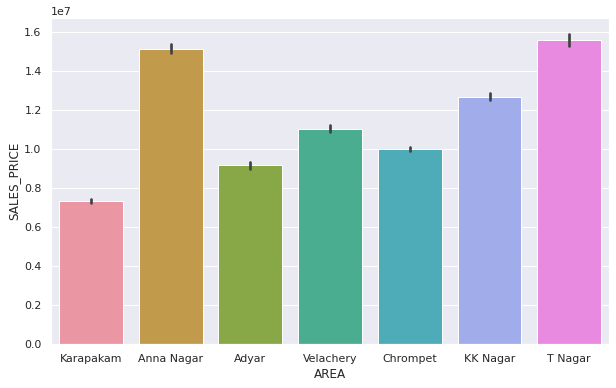

In [133]:
## Area when compared to Sales price
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['AREA'], y=df4['SALES_PRICE'])
## Here we can clearly see that T Nagar, Anna Nagar price was pretty much high.  so less number of property sale over there.
## adyar property price is average.  But there also less property sales.  there may be a chance it is deveoping area.
## Karapakam, Chrompet more property sales are happening.  price is also less only.

### Analyzing the Sales Condition Feature.

In [134]:
## Formatting the Sales condition Feature
df4['SALE_COND'].replace(['Ab Normal', 'Partiall', 'PartiaLl', 'Adj Land'],
                    ['AbNormal', 'Partial', 'Partial', 'AdjLand'], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



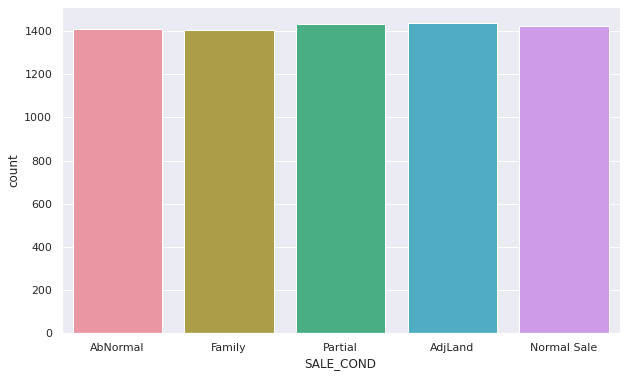

In [135]:
# Analysis using Count plot
plt.figure(figsize=(10, 6))
sns.countplot(df4['SALE_COND'])
## There is less number of difference over there. looks like it is not necessary feature

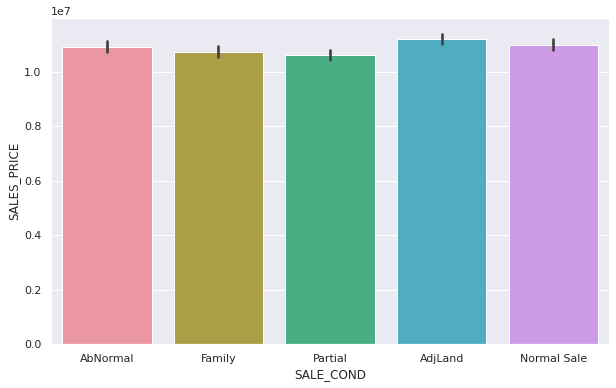

In [136]:
# Analysis using Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['SALE_COND'], y=df4['SALES_PRICE'])
# There is no more changes over there.  looks like it is not important. remove are don't remove we will think about it.

### Analysis on Park Facility

In [137]:
## formatting the Data
df4['PARK_FACIL'].replace(['Noo'], ['No'], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



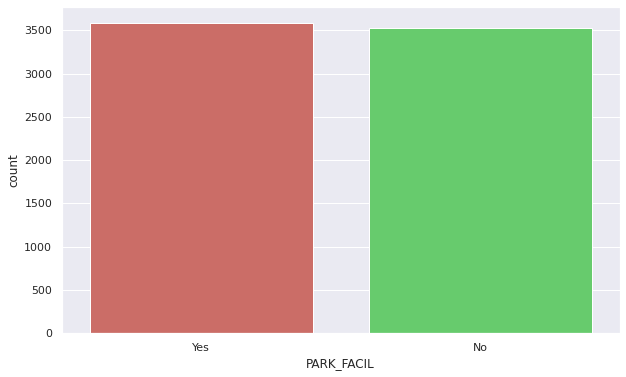

In [138]:
# Analysis using Count plot
plt.figure(figsize=(10, 6))
sns.countplot(df4['PARK_FACIL'])

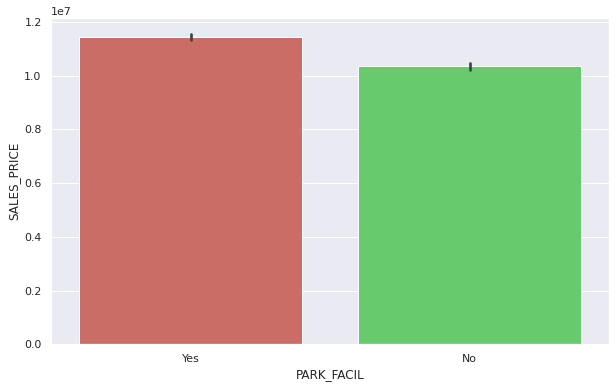

In [139]:
# Analysis using bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['PARK_FACIL'], y=df4['SALES_PRICE'])
# Again here also slight variation only.  But where the park pacility is there sales and sales price is sight high.

### Analysis on Buildtype

In [140]:
## formatting the Data 
df4['BUILDTYPE'].replace(['Comercial', 'Other'], ['Commercial', 'Others'], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



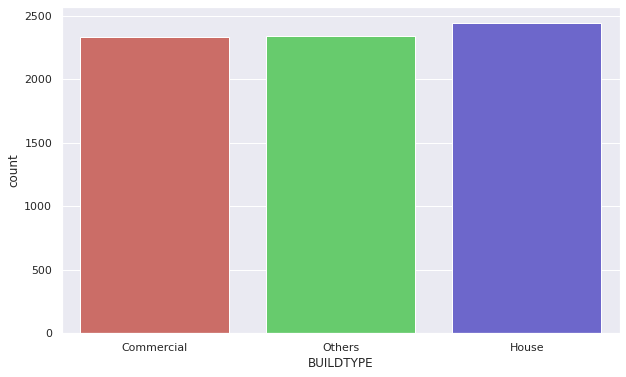

In [141]:
# Analysis using Count plot on buildtype feature
plt.figure(figsize=(10, 6))
sns.countplot(df4['BUILDTYPE'])
## when compared to commercial and others House's Sales count is slightly high.

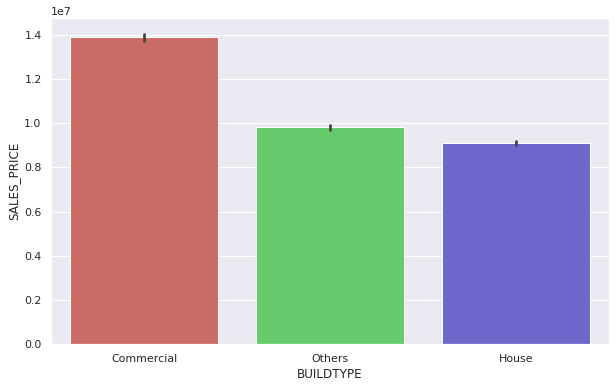

In [142]:
# Analysis using Bar plot on Buildtype feature
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['BUILDTYPE'], y=df4['SALES_PRICE'])
#  when compared to the others and house Commercial sale price is high. House sale price is very less.
#  But sales count is high on house.  we can buy lands build houses. and sell for peples.

### Analysis on UTILITY Available feature

In [143]:
## formatting the data
df4['UTILITY_AVAIL'].replace(['All Pub', 'NoSeWa'],['AllPub', 'NoSeWr'],inplace=True)

In [144]:
# df4['UTILITY_AVAIL'].replace(['NoSewr',"NoSeWr",'NoSewr'], ['nosewr', 'nosewr', 'nosewr' ], inplace=True)

In [145]:
df1['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [146]:
df4.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWr     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



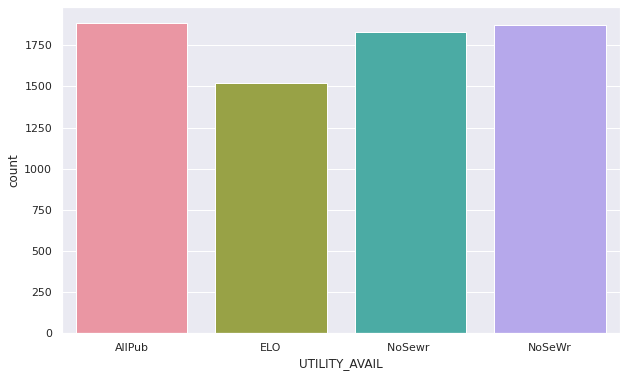

In [147]:
# Analysis using Count plot on utility avail
plt.figure(figsize=(10, 6))
sns.countplot(df4['UTILITY_AVAIL'])

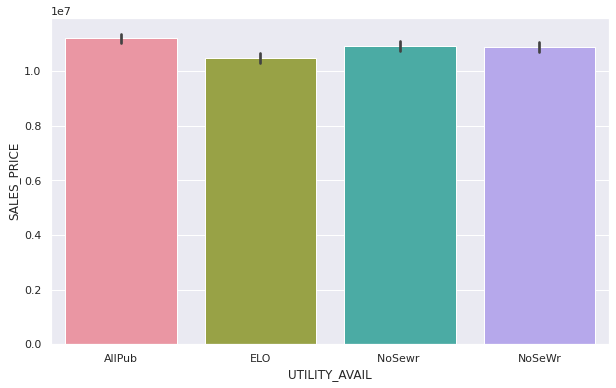

In [148]:
# Analyisi using Bar plot on utility avail
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['UTILITY_AVAIL'], y=df4['SALES_PRICE'])

### Analysing the street

In [149]:
## formatting the Data
df4['STREET'].replace(['Pavd', 'No Access'], ['Paved', 'NoAccess'], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



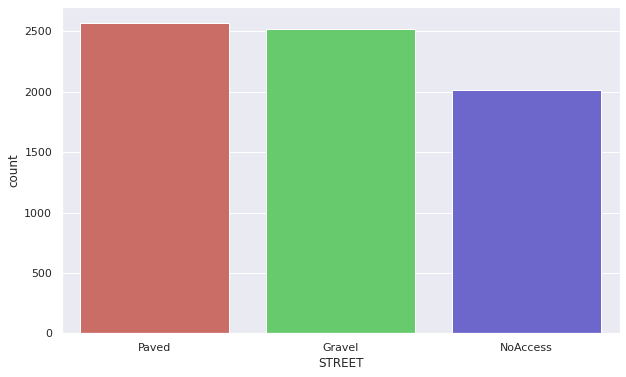

In [150]:
# Analysis using count plot on street feature
plt.figure(figsize=(10, 6))
sns.countplot(df4['STREET'])
# pavel and gravel roads are having more slael count

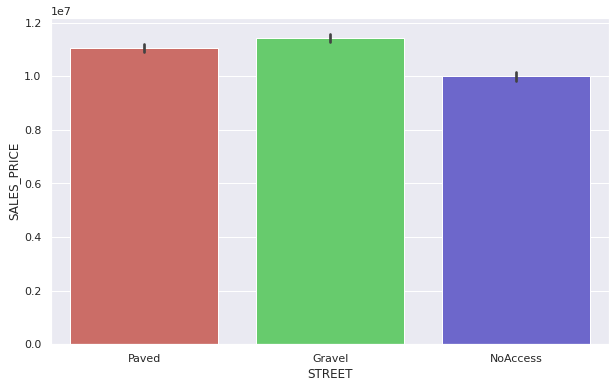

In [151]:
# Analysis using Bar plot on street feature
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['STREET'], y=df4['SALES_PRICE'])
# Sales count and sales price both high on Gravel streets. 

### Analysis on MZZONE Feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



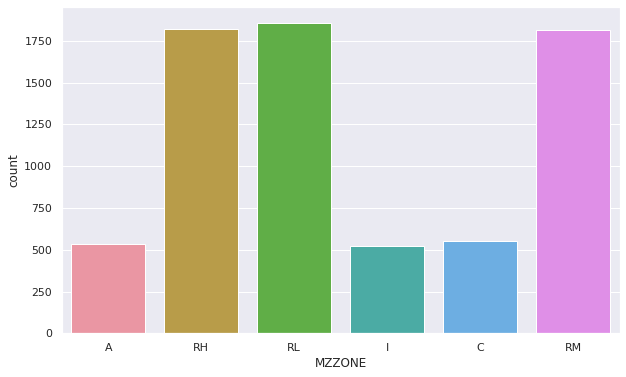

In [152]:
# Analysis using count plot on mzzone feature
plt.figure(figsize=(10, 6))
sns.countplot(df4['MZZONE'])

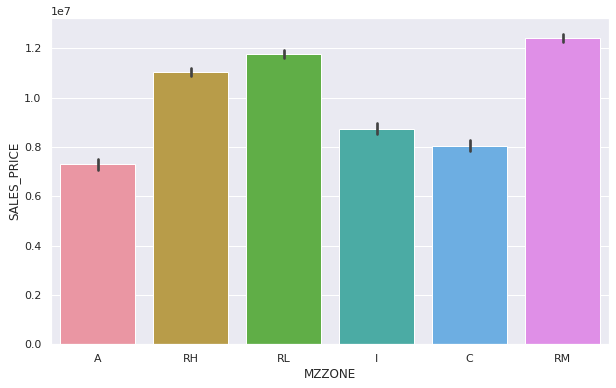

In [153]:
# Analysis using Bar plot on mzzone feature
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['MZZONE'], y=df4['SALES_PRICE'])

## Analysis on Numerical Descrite Features

### Analysis on N_BEDROOM Feature

In [154]:
numerical_discrete

['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']

In [155]:
df4['N_BEDROOM']

0       1.0
1       2.0
2       1.0
3       3.0
4       1.0
5       2.0
6       1.0
7       3.0
8       1.0
9       2.0
10      2.0
11      1.0
12      1.0
13      1.0
14      3.0
15      3.0
16      2.0
17      1.0
18      1.0
19      2.0
20      1.0
21      1.0
22      3.0
23      1.0
24      2.0
25      1.0
26      1.0
27      1.0
28      1.0
29      2.0
30      2.0
31      1.0
32      1.0
33      2.0
34      1.0
35      3.0
36      1.0
37      2.0
38      1.0
39      1.0
40      1.0
41      1.0
42      1.0
43      1.0
44      4.0
45      1.0
46      2.0
47      1.0
48      2.0
49      1.0
50      1.0
51      1.0
52      2.0
53      3.0
54      1.0
55      1.0
56      1.0
57      2.0
58      2.0
59      1.0
60      1.0
61      2.0
62      1.0
63      1.0
64      2.0
65      1.0
66      2.0
67      2.0
68      1.0
69      3.0
70      1.0
71      1.0
72      2.0
73      1.0
74      2.0
75      1.0
76      2.0
77      1.0
78      2.0
79      2.0
80      2.0
81      1.0
82      2.0
83  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



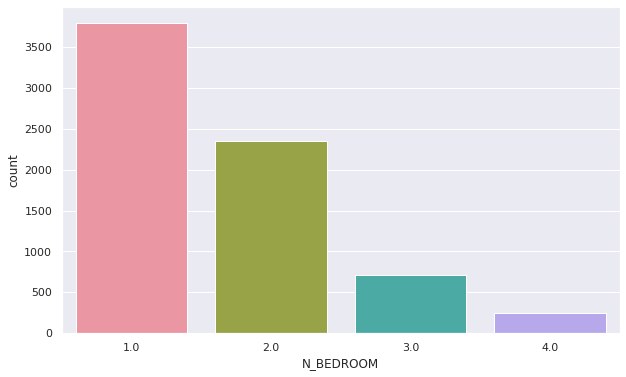

In [156]:
# Analysis using count plot on bedroom feature
plt.figure(figsize=(10, 6))
sns.countplot(df4['N_BEDROOM'])
## 1 bedroom after that 2 bedroom having a higher sale count.

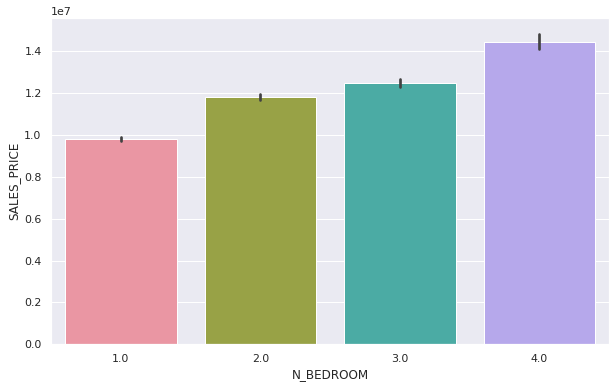

In [157]:
# Analysis using Bar plot on mzzone feature
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['N_BEDROOM'], y=df4['SALES_PRICE'])
# as we expected 4 bedroom and 3 bedroom price is quite high.





### Analysis on N_BATHROOM Feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



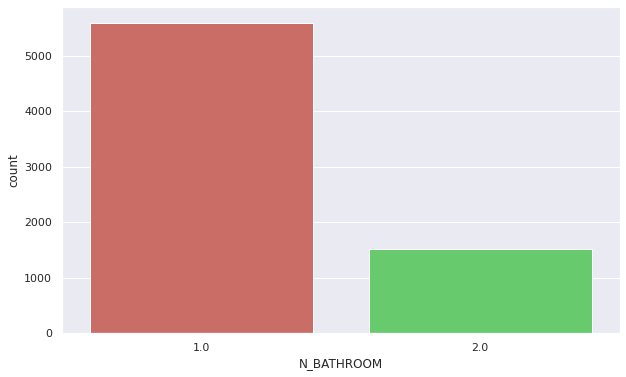

In [158]:
# Analysis using count plot on BATHROOM feature
plt.figure(figsize=(10, 6))
sns.countplot(df4['N_BATHROOM'])
# one bathroom is very very high sale count over there.

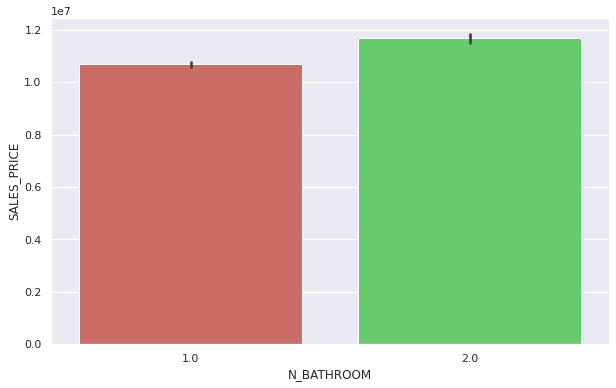

In [159]:
# Analysis using Bar plot on bathroom feature
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['N_BATHROOM'], y=df4['SALES_PRICE'])
# price of 2 bathroom house is slightly high.

### Analysis on room feature

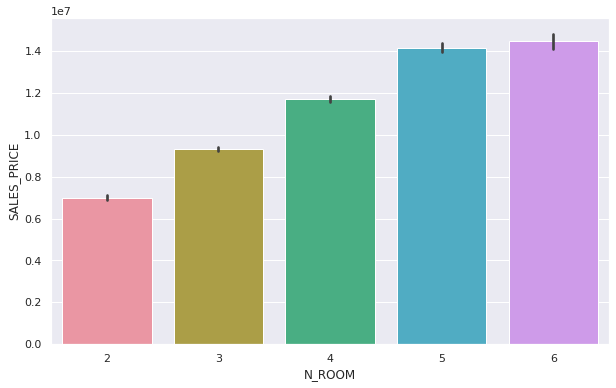

In [160]:
# Analysis using Bar plot on room feature
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['N_ROOM'], y=df4['SALES_PRICE'])
# increase on bedroom count sale count is also increasing.  There is a linear relationship over there.

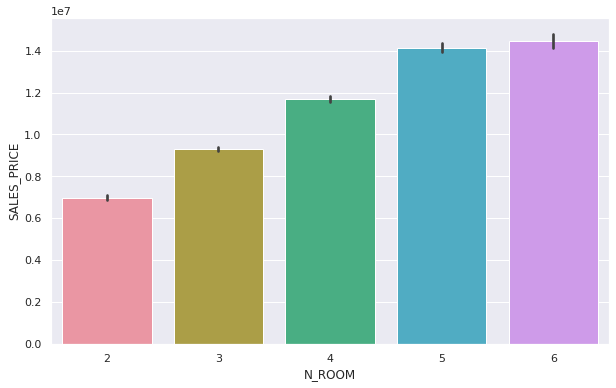

In [161]:
# Analysis using Bar plot on room feature
plt.figure(figsize=(10, 6))
sns.barplot(x=df4['N_ROOM'], y=df4['SALES_PRICE'])
# increase in bedroom price is also increases.  But sales also increases.
# It because of lot's of companies in chennai.  many unmarried peoples are working.  they are stay together in a rent house.  people buying houses and rent it.

## Analysis on Numerical continuous

In [162]:
numerical_continuous

['INT_SQFT', 'DIST_MAINROAD']

### ANALYSIS on sqft feature

In [163]:
# analysis using line plot sqft feature..
fig = px.line(df4, x="INT_SQFT", y="SALES_PRICE", title='Price based on sqft')
fig.show()

In [164]:
## Analysis using scatter plot on price feature 
fig = px.scatter(df4['INT_SQFT'], df4['SALES_PRICE'])
fig.show()

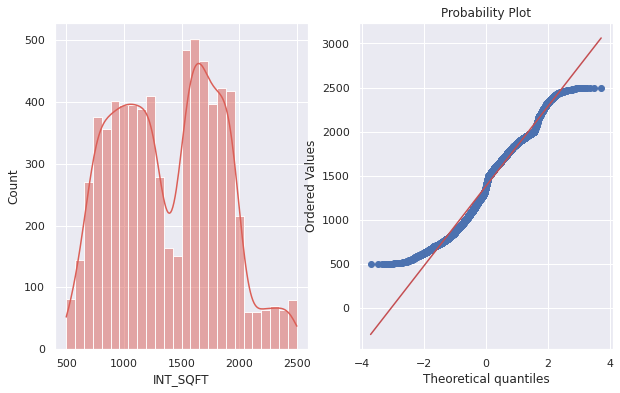

In [165]:
## analysis using histogram on sqft feature 
plot_data(df4, 'INT_SQFT')





#### observaions:
1. Square feet feature we can clearly see that it is not following the normal distribution.
2. There is linear relationship with respect to sales price.
3. in feature engineering we try to transform the features.

### Analysis on distance from mainroad feature

In [166]:
# analysis using line plot distance from mainroad feature..
fig = px.line(df4, x="DIST_MAINROAD", y="SALES_PRICE", title='Price based on sqft')
fig.show()

In [167]:
## Analysis using scatter plot on distance from mainroad feature 
fig = px.scatter(df4['DIST_MAINROAD'], df4['SALES_PRICE'])
fig.show()

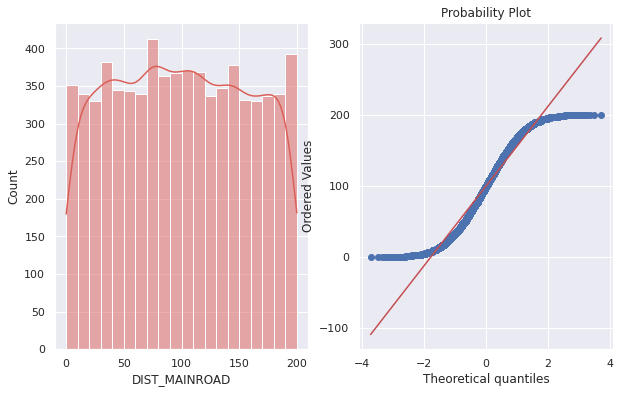

In [168]:
plot_data(df4, 'DIST_MAINROAD')

### observaions:
1. distance from mainroad feature we can clearly see that it is not following the normal distribution.
2. Datapoints is scattered over spreadly
2. There is no linear relationship with respect to sales price.
3. in feature engineering we try to transform the features.
4. after multivariate analysis we have to perform bucket analysis.

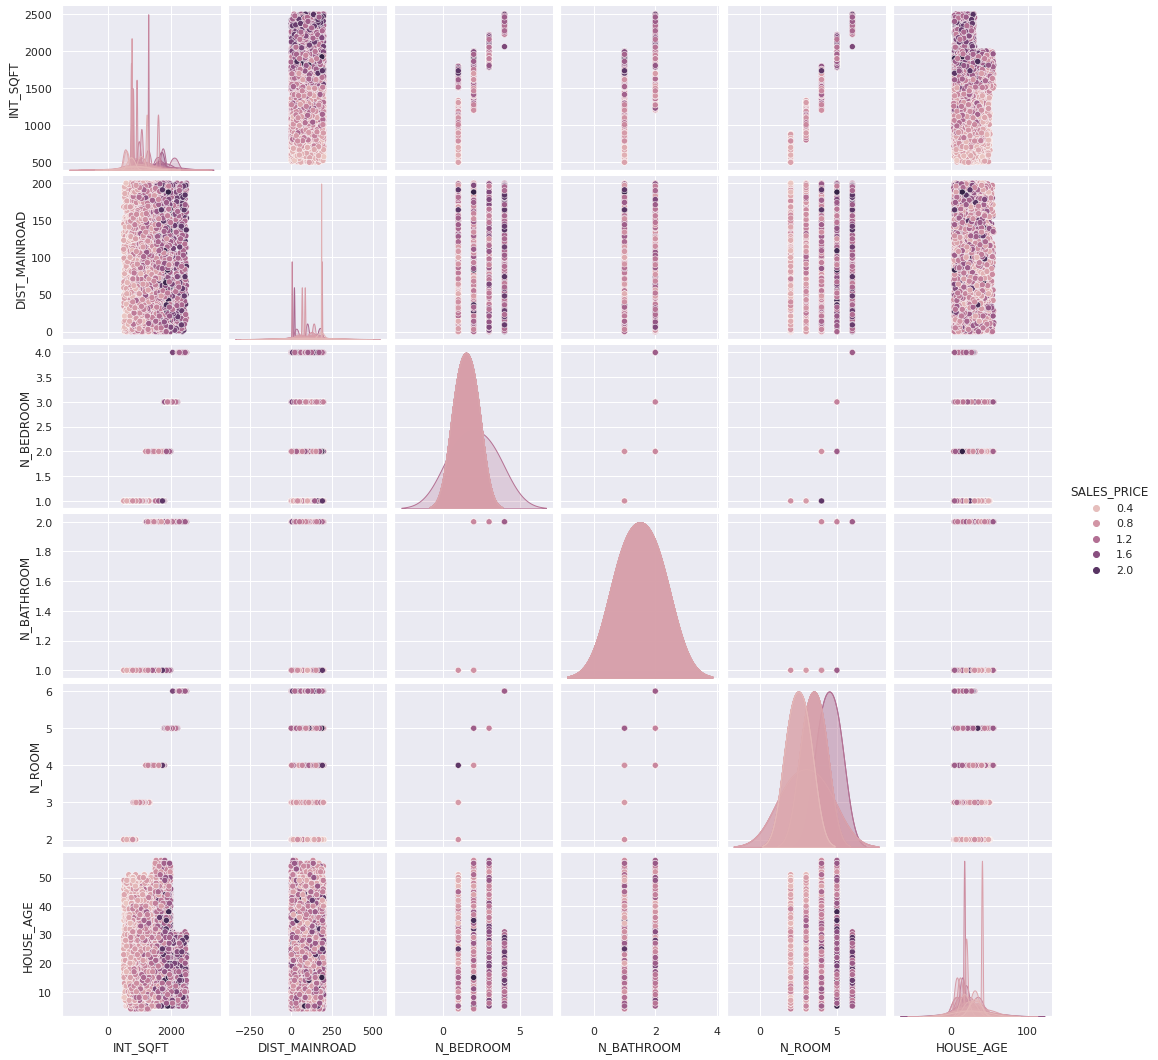

In [169]:
sns.pairplot(df4,hue="SALES_PRICE")

In [170]:
df4.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOUSE_AGE
0,Karapakam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,44.0
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,11.0
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,20.0
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,9630290,22.0
4,Karapakam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,30.0
